In [29]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [30]:
#import the data
CADCHF = yf.Ticker("CADCHF=X")

In [31]:
data = yf.download("CADCHF=X", start="2017-01-01", end="2022-08-10")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [32]:
data.head()

Date
2017-01-02    0.75439
2017-01-03    0.76183
2017-01-04    0.76400
2017-01-05    0.76697
2017-01-06    0.76321
Name: Adj Close, dtype: float64

In [33]:
data.tail()

Date
2022-08-04    0.74772
2022-08-05    0.74126
2022-08-08    0.74328
2022-08-09    0.74276
2022-08-10    0.73990
Name: Adj Close, dtype: float64

In [34]:
log_returns = np.log(1 + data.pct_change())

In [35]:
log_returns.tail()

Date
2022-08-04    0.005498
2022-08-05   -0.008677
2022-08-08    0.002721
2022-08-09   -0.000700
2022-08-10   -0.003858
Name: Adj Close, dtype: float64

Text(0, 0.5, 'Price USD')

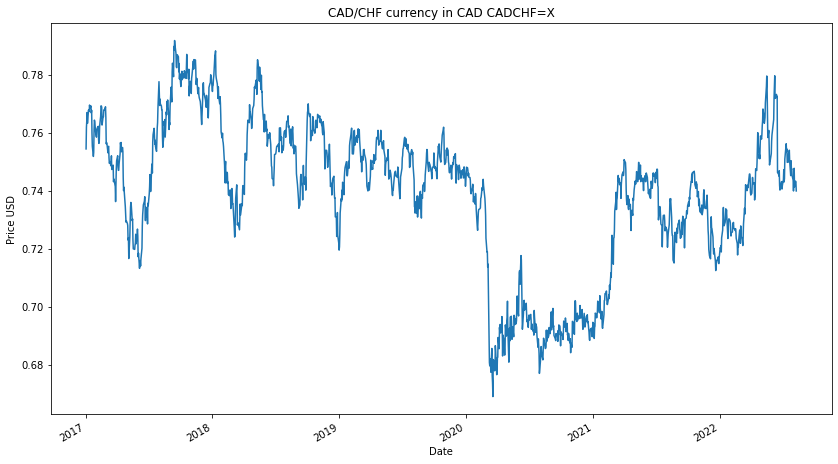

In [36]:
data.plot(figsize=(14,8))
plt.title('CAD/CHF currency in CAD CADCHF=X')
plt.ylabel('Price USD')

In [37]:
u = log_returns.mean()
u

-1.3274774120360284e-05

In [38]:
var = log_returns.var()
var

2.406700074624333e-05

In [39]:
stdev = log_returns.std()
stdev

0.004905812954673601

In [40]:
drift = u - (0.5 * var)
drift

-2.530827449348195e-05

In [41]:
np.array(drift)

array(-2.53082745e-05)

In [42]:
np.array(stdev)

array(0.00490581)

In [43]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [44]:
x = np.random.rand(10,2)
x

array([[0.30391052, 0.80535209],
       [0.52387988, 0.282238  ],
       [0.16556872, 0.27031009],
       [0.67881145, 0.19781175],
       [0.15857746, 0.14033997],
       [0.45716952, 0.94710462],
       [0.78303549, 0.31264759],
       [0.89629653, 0.05861742],
       [0.7865607 , 0.3021295 ],
       [0.13667168, 0.6306465 ]])

In [45]:
norm.ppf(x)

array([[-0.51318625,  0.86089509],
       [ 0.05989376, -0.57620592],
       [-0.97182534, -0.61187542],
       [ 0.46437779, -0.84946339],
       [-1.00032155, -1.07879316],
       [-0.10756716,  1.61740555],
       [ 0.78248599, -0.48835957],
       [ 1.26072779, -1.56648617],
       [ 0.79454435, -0.51828563],
       [-1.0953956 ,  0.33356609]])

In [46]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.69831974, -1.7066506 ],
       [ 0.08733009, -1.75939231],
       [ 0.69228277, -0.40579229],
       [ 0.45170796, -0.48202382],
       [ 0.24751708,  1.34016682],
       [ 0.9081213 ,  1.4166229 ],
       [ 0.11814146, -1.6679041 ],
       [-0.73747209,  0.11626352],
       [-3.83860122, -2.6687505 ],
       [-0.69938709, -0.18631181]])

In [47]:
t_intervals = 120
interations = 500

In [48]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[1.00453153, 0.99949096, 0.99837826, ..., 0.99985364, 1.00436793,
        1.00040532],
       [1.00320852, 0.99389922, 1.00265429, ..., 0.99057639, 0.99998833,
        1.00221837],
       [0.99898451, 1.00214027, 0.99986412, ..., 0.99776763, 0.9966071 ,
        1.00593415],
       ...,
       [0.99988448, 0.99484665, 0.99828174, ..., 1.01933267, 0.99746773,
        0.99851443],
       [0.99759676, 1.00733231, 0.99630697, ..., 0.99657784, 1.00002667,
        0.99741054],
       [1.00968653, 1.00354947, 1.00115879, ..., 1.00058239, 0.99664848,
        0.99507976]])

In [49]:
s_zero = data.iloc[-1]
s_zero

0.7398999929428101

In [50]:
price_list = np.zeros_like(daily_returns)

In [51]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
price_list[0] = s_zero
price_list

array([[0.73989999, 0.73989999, 0.73989999, ..., 0.73989999, 0.73989999,
        0.73989999],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [54]:
price_list

array([[0.73989999, 0.73989999, 0.73989999, ..., 0.73989999, 0.73989999,
        0.73989999],
       [0.74227398, 0.73538602, 0.7418639 , ..., 0.73292746, 0.73989136,
        0.74154136],
       [0.74152021, 0.73695995, 0.7417631 , ..., 0.7312913 , 0.73738098,
        0.74594178],
       ...,
       [0.68173091, 0.7070726 , 0.79375404, ..., 0.72543707, 0.6854508 ,
        0.71451637],
       [0.68009254, 0.71225707, 0.79082268, ..., 0.72295451, 0.68546908,
        0.71266615],
       [0.68668028, 0.71478521, 0.79173908, ..., 0.72337556, 0.68317172,
        0.70915967]])

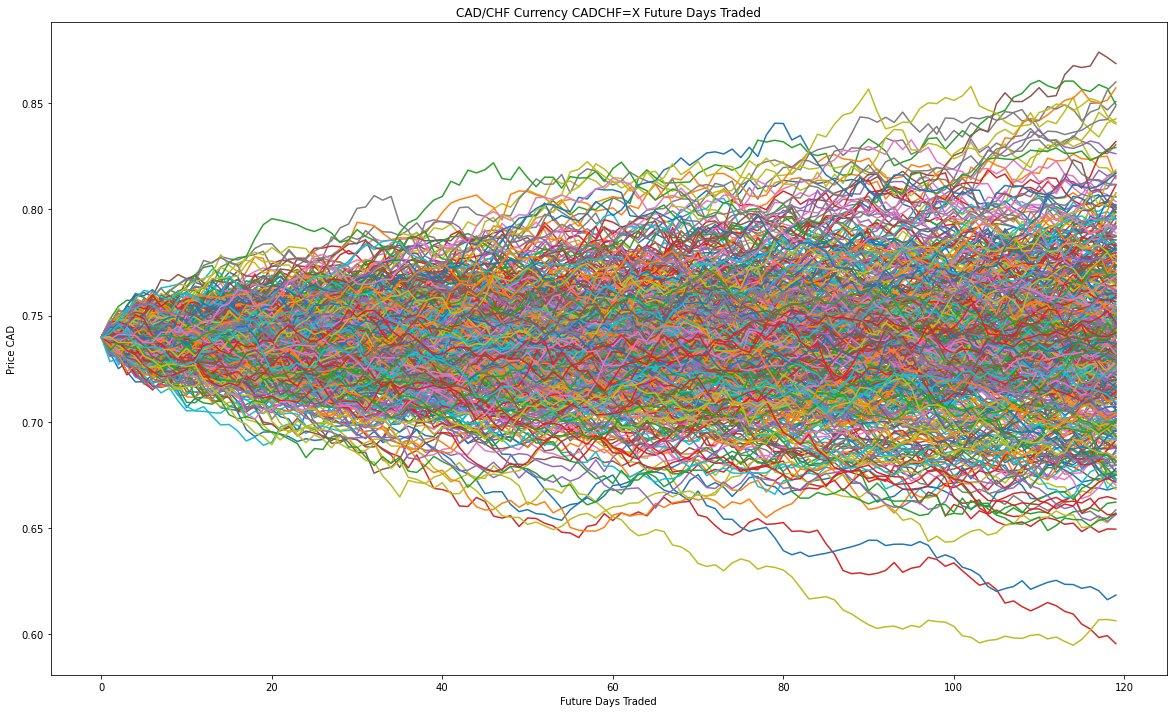

In [55]:
plt.figure(figsize=(20,12))
plt.title('CAD/CHF Currency CADCHF=X Future Days Traded')
plt.xlabel('Future Days Traded')
plt.ylabel('Price CAD')
plt.plot(price_list)